# `jupypres`

## `matplotlib` wrappers for preparing scientific presentations from a jupyter notebook

### Burak Budanur 
#### March 04, 2021

This notebook demonstrates basic usage of `jupypres`.

- Standard `reveal.js` functionality supported in jupyter slides is readily available. 

- Such as an item-by-item appearing list

In [1]:
import numpy as np 
from scipy.integrate import odeint 
from scipy.optimize import fsolve
import matplotlib as mpl
from matplotlib import pyplot as plt 
from mpl_toolkits.mplot3d import axes3d
import sys
import os

In [2]:
from IPython.display import display, Javascript
mpl.rcParams['text.usetex'] = True
sys.path.append('../')
import jupypres
%config InlineBackend.figure_format = 'retina'
import warnings
warnings.filterwarnings('ignore')

from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: right;
    vertical-align: middle;
}
</style>
""")

In [3]:
def lorenz(state, time, parameters):
    
    sigma, beta, rho = parameters
    x, y, z = state
    
    rhs = np.array([ 
            sigma * (y - x), 
            x * (rho - z) - y,
            x * y - beta * z
        ])
    
    return rhs

t = np.arange(0, 110, 0.01)
initial_state = np.array([0.1, 0.1, 0.1])
parameters = [10, 8.0/3.0, 28]
eq1 = fsolve(lorenz, np.array([7, 7, 25]), args=(0, parameters,))
eq2 = fsolve(lorenz, np.array([-7, -7, 25]), args=(0, parameters,))

solution = odeint(lorenz, initial_state, t, args=(parameters,))

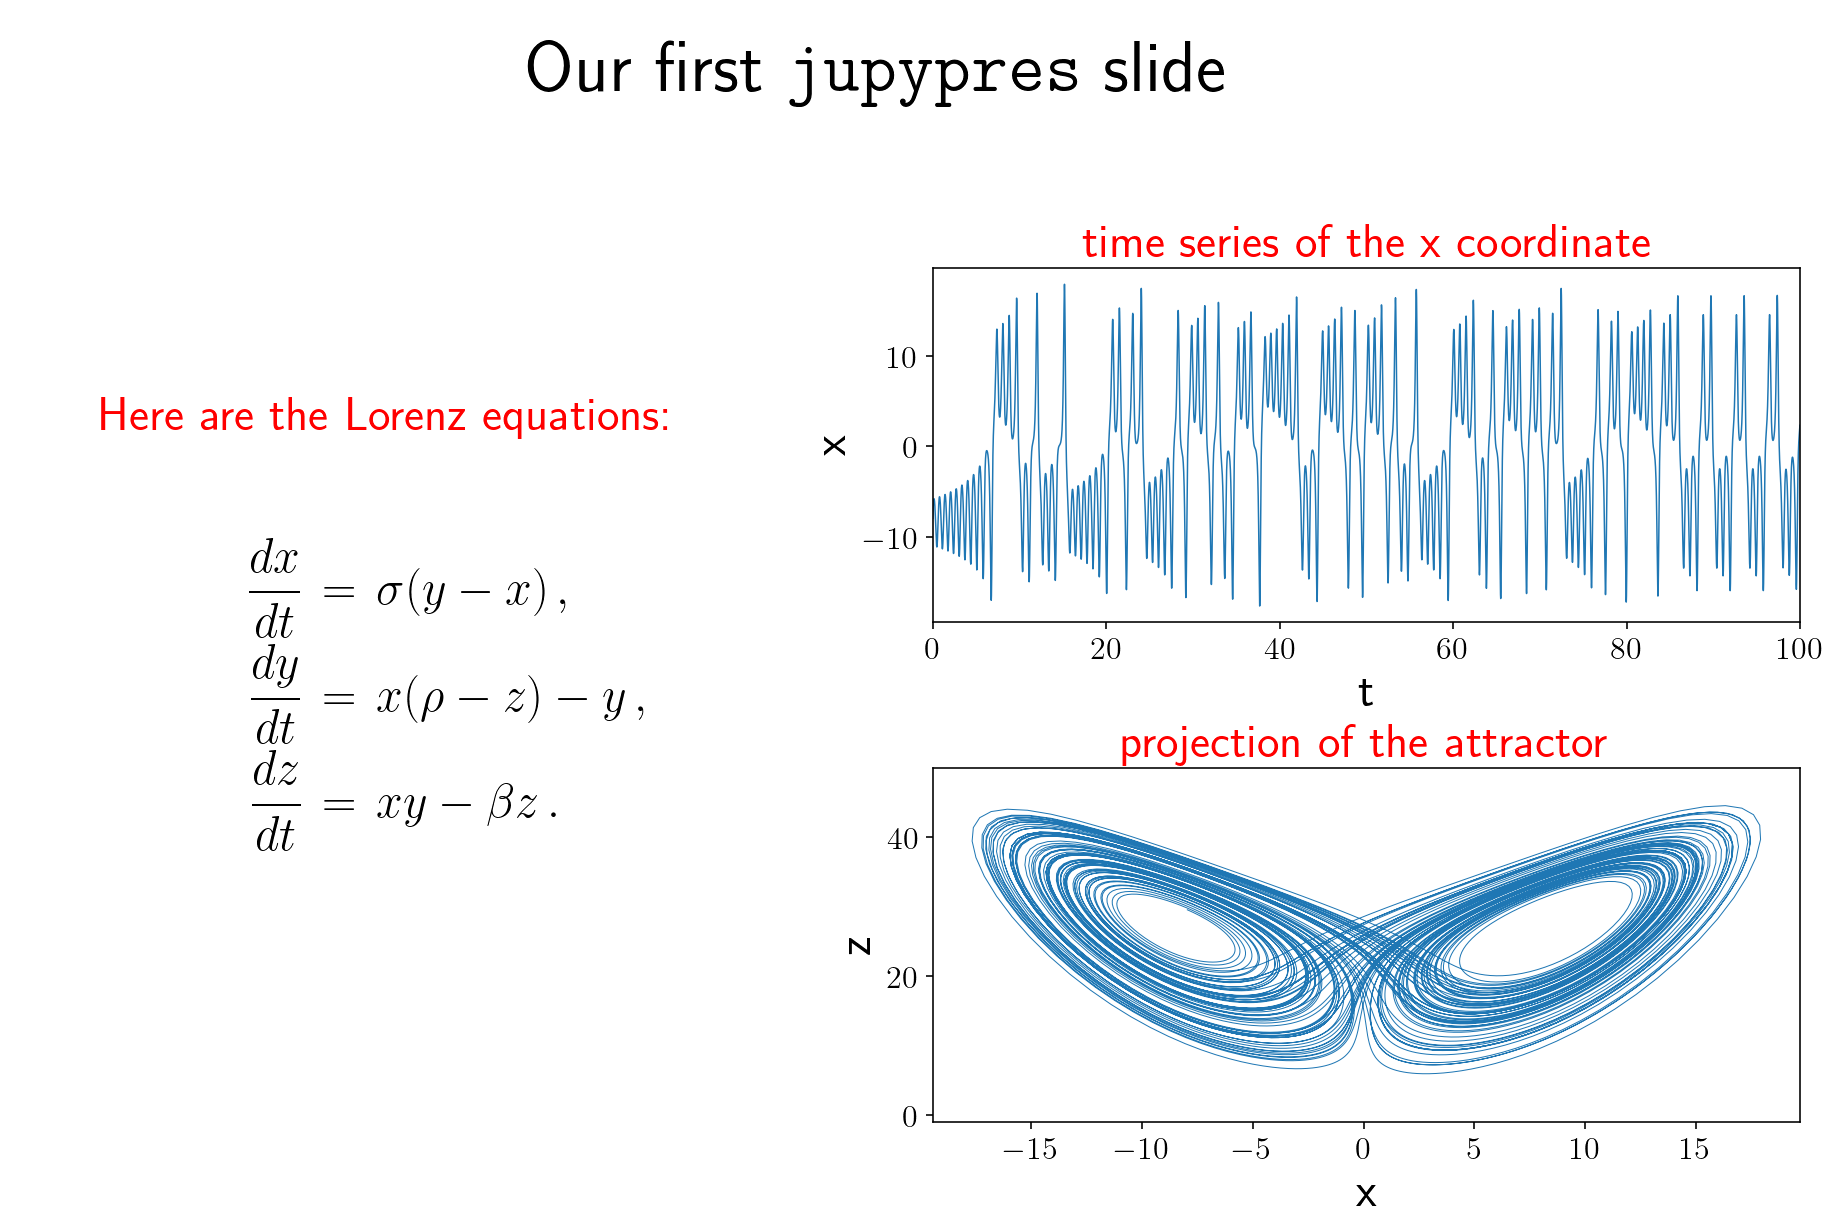

In [4]:
slide = jupypres.slide(
    """
FFFFFF
TTTAAA
TTTAAA
TTTAAA
TTTEEE
TTTBBB
TTTBBB
TTTBBB
""", title="Our first \\texttt{jupypres} slide")

slide['T'].text(0.1, 0.85, 
               "Here are the Lorenz equations:",
               horizontalalignment='left',
               verticalalignment='top',
               fontsize=24,
               color='red')

eq =  (r"\begin{eqnarray*}"
       r"\frac{dx}{dt} &=& \sigma (y - x) \,,  \\"
       r"\frac{dy}{dt} &=& x(\rho - z) - y \,, \\"
       r"\frac{dz}{dt} &=& xy - \beta z  \, ."
       r"\end{eqnarray*}")


eq_text = slide['T'].text(
    0.5, 0.5, eq,
    horizontalalignment='center',
    verticalalignment='center',
    fontsize=24,
    color='black'
)

slide['A'].plot(t[1000:] - 10, solution[1000:, 0], lw=0.75)
title_A = slide['A'].set_title('time series of the x coordinate', fontsize=24, color='red')
slide['A'].set_xlabel('t', fontsize=24)
slide['A'].set_ylabel('x', fontsize=24)
slide['A'].set_xlim(0, 100)

slide['B'].plot(solution[1000:, 0], solution[1000:, 2], lw=0.5)
title_A = slide['B'].set_title('projection of the attractor', fontsize=24, color='red')
slide['B'].set_ylim(-1, 50)

slide['B'].set_xlabel('x', fontsize=24)
slide['B'].set_ylabel('z', fontsize=24);

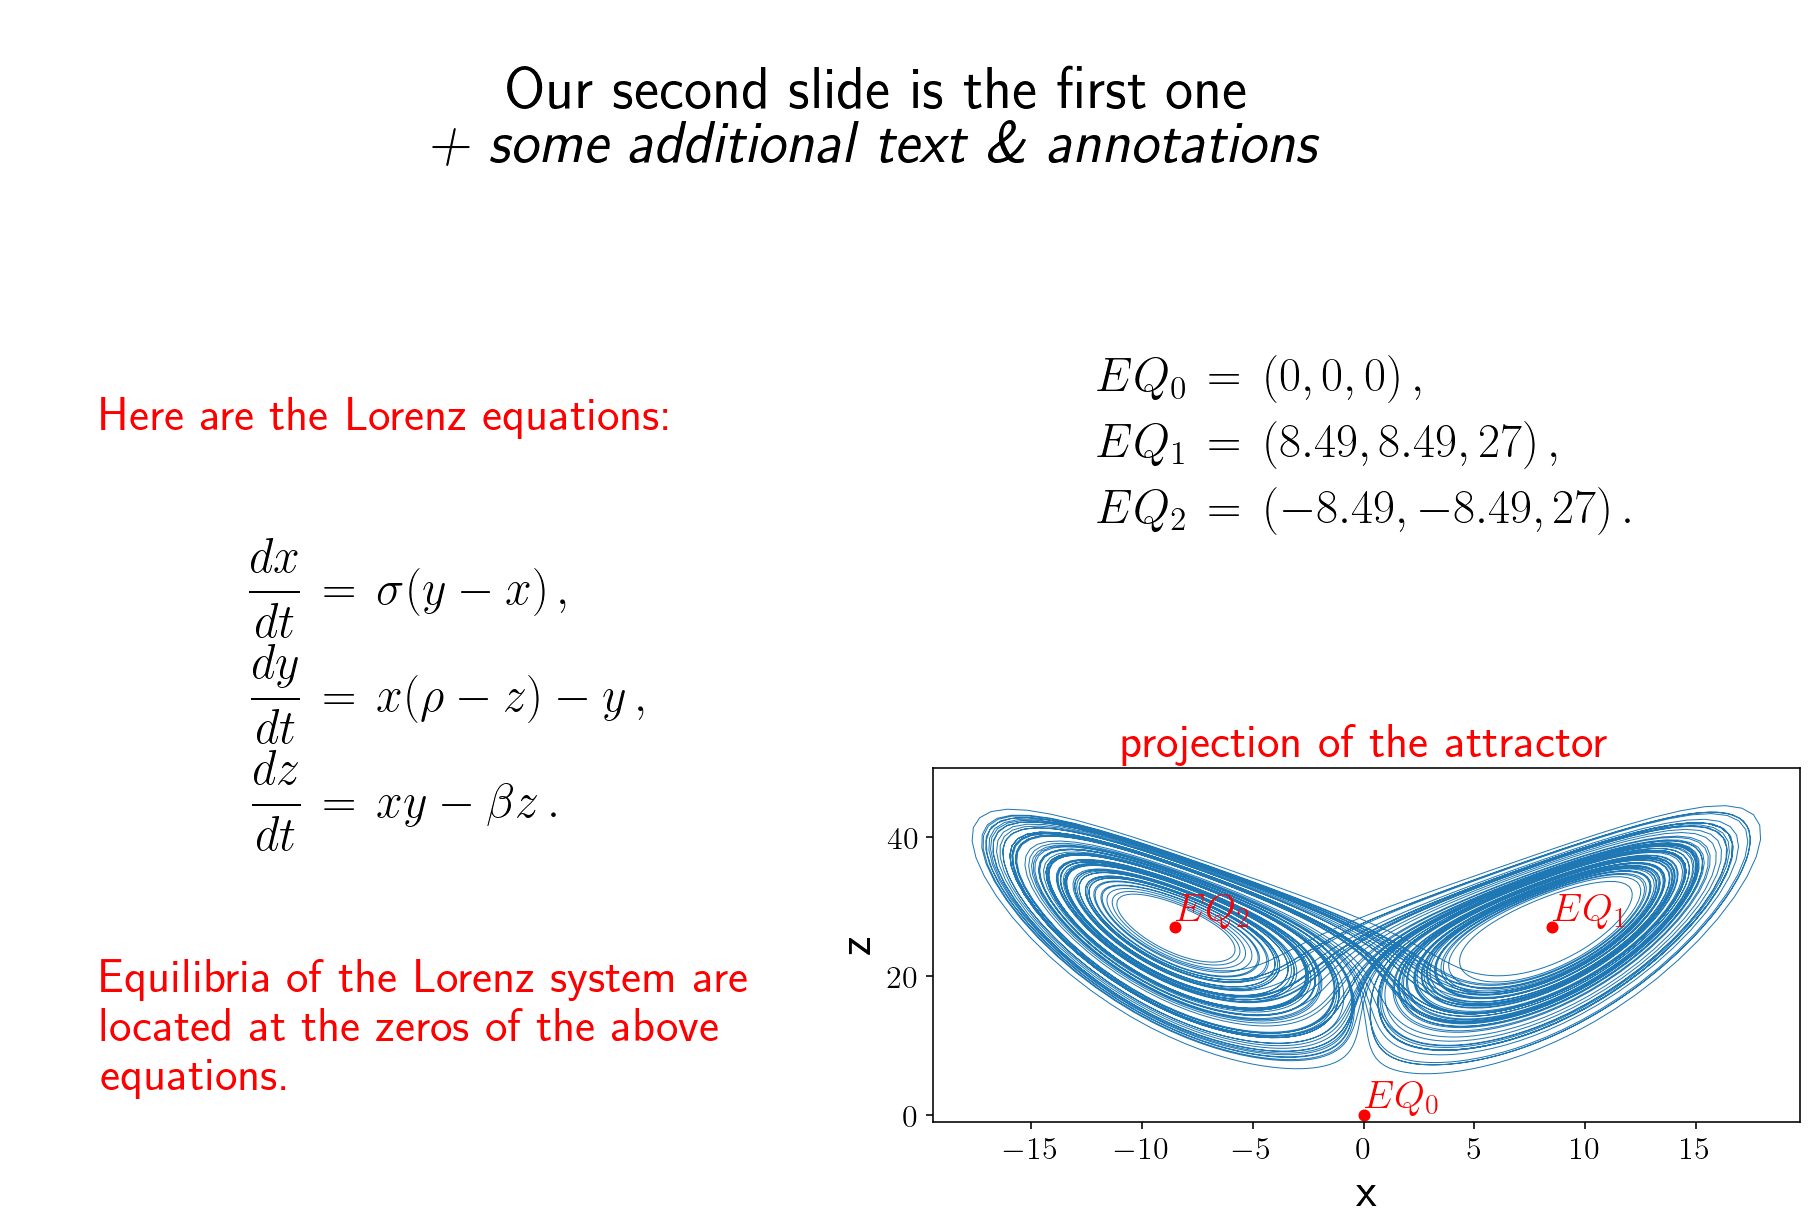

In [5]:
slide, fig = jupypres.duplicate_slide()

slide['T'].text(0.1, 0.25, 
               """
               Equilibria of the Lorenz system are  
               located at the zeros of the above 
               equations. 
               """
               ,
               horizontalalignment='left',
               verticalalignment='top',
               fontsize=24,
               color='red')

slide['A'].clear()
slide['A'].axis("off")
equilibria =  (r"\begin{eqnarray*}"
       r"EQ_{0} &=& (0, 0, 0) \,,  \\"
       r"EQ_{1} &=& (8.49, 8.49, 27) \,,  \\"
       r"EQ_{2} &=& (-8.49, -8.49, 27) \,. "
       r"\end{eqnarray*}")


eq_text = slide['A'].text(
    0.5, 0.5, equilibria,
    horizontalalignment='center',
    verticalalignment='center',
    fontsize=24,
    color='black'
)

slide['B'].plot(0, 0, '.r', ms=10)
slide['B'].text(0, 0 + 1, '$EQ_0$', fontsize=20, color='red')

slide['B'].plot(eq1[0], eq1[2], '.r', ms=10)
slide['B'].text(eq1[0], eq1[2] + 1, '$EQ_1$', fontsize=20, color='red')

slide['B'].plot(eq2[0], eq2[2], '.r', ms=10)
slide['B'].text(eq2[0], eq2[2] + 1, '$EQ_2$', fontsize=20, color='red')

fig.suptitle("\n Our second slide is the first one \n \\textit{+ some additional text \& annotations}", fontsize=30, linespacing=1)
fig

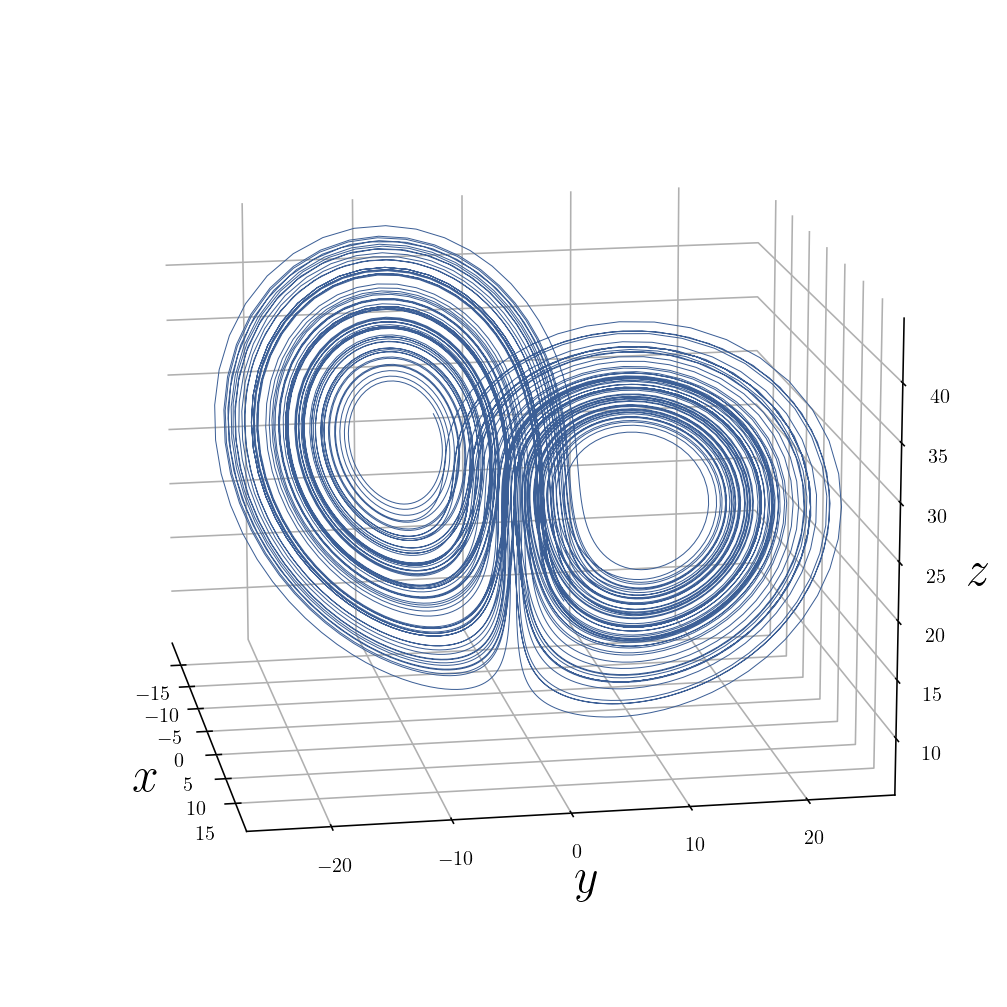

In [6]:
fig = plt.figure(figsize=(16,9))  
ax = plt.axes(projection='3d')

ax.w_xaxis.set_pane_color((1, 1, 1, 1.0))
ax.w_yaxis.set_pane_color((1, 1, 1, 1.0))
ax.w_zaxis.set_pane_color((1, 1, 1, 1.0))

ax.set_xlabel('$x$', fontsize=24)
ax.set_ylabel('$y$', fontsize=24)
ax.set_zlabel('$z$', fontsize=24)

ax.plot(solution[1000:, 0], 
        solution[1000:, 1], 
        solution[1000:, 2], 
        color='#3c5f96', lw=0.5)

if not os.path.exists('projections'):
    os.makedirs('projections')
    
for phi in range(0, 360, 10):
    ax.view_init(15, phi)
    fig.savefig(f"projections/{str(phi//10).zfill(2)}.png", dpi=100)

In [7]:
# Making a video from the projections, this requires ffmpeg to be installed
if os.path.isfile('lorenz.mp4'):
    os.system("rm lorenz.mp4");

os.system("ffmpeg -r 10 -i projections/%02d.png -c:v libx264 -vf fps=25 -pix_fmt yuv420p lorenz.mp4");

### 3D projection of the Lorenz attractor from different angles

In [8]:
jupypres.Video("lorenz.mp4", embed=True, html_attributes="controls muted autoplay loop")

# Conclusion

With `jupypres`, one can

- prepare slides with nearly arbitrary layouts

- type `latex` equations

- annotate figures

- show videos 

In [9]:
# After this cell runs successfully, the slides will be jupypres.slides.html in the current directory
display(Javascript('IPython.notebook.save_checkpoint();'))
os.system("jupyter nbconvert jupypres.ipynb --to slides --no-input --SlidesExporter.reveal_transition=fade");

<IPython.core.display.Javascript object>